# PROJECT 2

## Importing Libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##  Loading Datasets   

In [2]:
Train_Data=pd.read_csv("Train.csv")
Riders_Data=pd.read_csv("Riders.csv")

## Merging Datasets 

In [3]:
Complete_Dataset=Train_Data.merge(Riders_Data, on='Rider Id')

In [4]:
Complete_Dataset.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_27440,User_Id_2642,Bike,3,Personal,18,5,3:41:17 PM,18,5,...,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,2886,1637,1309,13.8,549
2,Order_No_14170,User_Id_3339,Bike,3,Business,31,5,12:51:41 PM,31,5,...,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,2615,1637,1309,13.8,549
3,Order_No_21727,User_Id_3523,Bike,3,Personal,2,2,7:12:10 AM,2,2,...,-1.290315,36.757377,-1.223520,36.802061,Rider_Id_432,2986,1637,1309,13.8,549
4,Order_No_8301,User_Id_87,Bike,2,Personal,22,2,10:40:58 AM,22,2,...,-1.273524,36.799220,-1.300431,36.752427,Rider_Id_432,1602,1637,1309,13.8,549


#  

## EDA 

## Grouping Data by Placement Day of Month  

In [5]:
Placement_Day_Grouped=Complete_Dataset.groupby(['Placement - Day of Month'], as_index=False).mean()

In [6]:
PDG=Placement_Day_Grouped[['Placement - Day of Month','Time from Pickup to Arrival']].sort_values('Time from Pickup to Arrival',ascending=False)

In [7]:
PDG['Time from Pickup to Arrival']=PDG['Time from Pickup to Arrival']/60

## Graphical Representation of ETA on Various days  

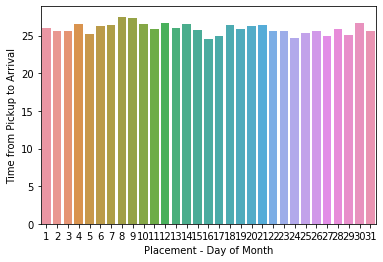

In [8]:
sns.barplot(x='Placement - Day of Month',y='Time from Pickup to Arrival',data=PDG)

### From the above data, it is obvious that the average ETA for the various placement days are not significantly different 

### Grouping Data by Placement Weekday  

In [9]:
Placement_Weekday_Grouped=Complete_Dataset.groupby(['Placement - Weekday (Mo = 1)'], as_index=False).mean()

In [10]:
PWG=Placement_Weekday_Grouped[['Placement - Weekday (Mo = 1)','Time from Pickup to Arrival']].sort_values('Time from Pickup to Arrival',ascending=False)

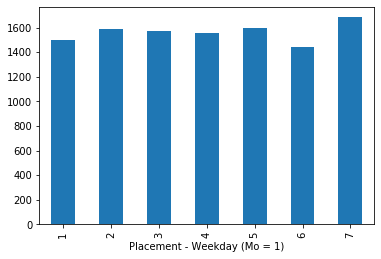

In [177]:
Complete_Dataset.groupby('Placement - Weekday (Mo = 1)')['Time from Pickup to Arrival'].mean().plot(kind='bar')

In [11]:
PWG

,Placement - Weekday (Mo = 1),Time from Pickup to Arrival
6,7,1683.032258
4,5,1595.178813
1,2,1589.976257
2,3,1573.379545
3,4,1556.106197
0,1,1496.081288
5,6,1445.685200


### On the average, it takes much time to deliver on orders placed on Sundays and Fridays. Placements on Mondays and Saturdays are faster. 

##  

## Grouping Data by Confirmation Day of Month

In [12]:
Confirmation_Day_Grouped=Complete_Dataset.groupby(['Confirmation - Day of Month'], as_index=False).mean()

In [13]:
CDG=Confirmation_Day_Grouped[['Confirmation - Day of Month','Time from Pickup to Arrival']].sort_values('Time from Pickup to Arrival',ascending=False)

In [14]:
CDG

,Confirmation - Day of Month,Time from Pickup to Arrival
7,8,1650.161557
8,9,1636.578711
29,30,1602.392157
11,12,1596.331832
9,10,1589.863188
13,14,1589.348259
3,4,1589.240572
20,21,1587.523883
6,7,1584.419708
17,18,1583.092208


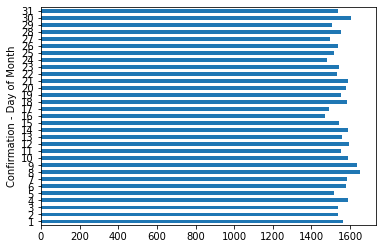

In [179]:
Complete_Dataset.groupby('Confirmation - Day of Month')['Time from Pickup to Arrival'].mean().plot(kind='barh')

### From the above data, it is obvious that the average ETA in seconds for the various confirmation days are not significantly different. 

### Grouping Data by Confirmation Weekday 

In [16]:
Confirmation_Weekday_Grouped=Complete_Dataset.groupby(['Confirmation - Weekday (Mo = 1)'], as_index=False).mean()

In [17]:
CWG=Confirmation_Weekday_Grouped[['Confirmation - Weekday (Mo = 1)','Time from Pickup to Arrival']].sort_values('Time from Pickup to Arrival',ascending=False)

In [18]:
CWG

,Confirmation - Weekday (Mo = 1),Time from Pickup to Arrival
6,7,1683.032258
4,5,1595.178813
1,2,1590.174792
2,3,1573.379545
3,4,1556.176638
0,1,1495.779303
5,6,1445.685200


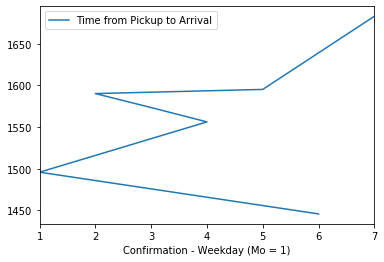

In [181]:
CWG.plot(kind='line', x='Confirmation - Weekday (Mo = 1)',y='Time from Pickup to Arrival')

### On the average, it takes much time (in seconds) to deliver on orders confirmed on Sundays and Fridays. Placements on Mondays and Saturdays are faster. 

#  

In [19]:
Pickup_Day_Grouped=Complete_Dataset.groupby(['Pickup - Day of Month'], as_index=False).mean()           

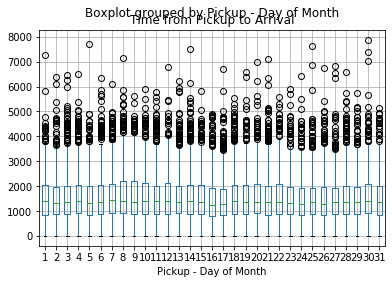

In [209]:
Complete_Dataset.boxplot(by='Pickup - Day of Month', column=['Time from Pickup to Arrival'], grid=True)

The diagram above shows the boxplot of time from pickup to arrival for the days of the month.

In [20]:
PkDG=Pickup_Day_Grouped[['Pickup - Day of Month','Time from Pickup to Arrival']].sort_values('Time from Pickup to Arrival',ascending=False)

In [21]:
PkDG

,Pickup - Day of Month,Time from Pickup to Arrival
7,8,1650.161557
8,9,1636.578711
29,30,1602.392157
11,12,1596.331832
9,10,1589.863188
13,14,1589.348259
3,4,1589.240572
20,21,1587.523883
6,7,1584.419708
17,18,1583.092208


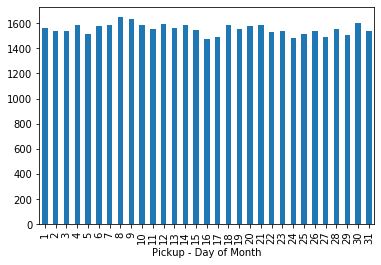

In [210]:
Complete_Dataset.groupby('Pickup - Day of Month')['Time from Pickup to Arrival'].mean().plot(kind='bar')

#  

In [22]:
Pickup_Weekday_Grouped=Complete_Dataset.groupby(['Pickup - Weekday (Mo = 1)'], as_index=False).mean()

In [23]:
PkWG=Pickup_Weekday_Grouped[['Pickup - Weekday (Mo = 1)','Time from Pickup to Arrival']].sort_values('Time from Pickup to Arrival',ascending=False)

In [24]:
PkWG

,Pickup - Weekday (Mo = 1),Time from Pickup to Arrival
6,7,1683.032258
4,5,1595.178813
1,2,1590.174792
2,3,1573.379545
3,4,1556.176638
0,1,1495.779303
5,6,1445.685200


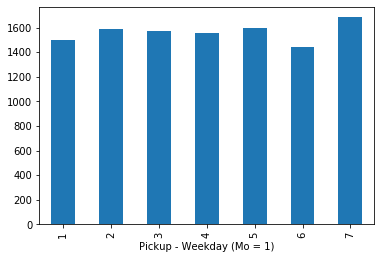

In [211]:
Complete_Dataset.groupby('Pickup - Weekday (Mo = 1)')['Time from Pickup to Arrival'].mean().plot(kind='bar')

Pickups done on Mondays and Saturdays have the fastest ETA. 

#  

## Grouping by Platform type

In [25]:
Platform_Grouped=Complete_Dataset.groupby(['Platform Type'], as_index=False).mean()

In [26]:
Platform_Type=Platform_Grouped[['Platform Type','Time from Pickup to Arrival']].sort_values('Time from Pickup to Arrival',ascending=False)

In [27]:
Platform_Type

,Platform Type,Time from Pickup to Arrival
3,4,1675.150000
0,1,1572.799721
2,3,1555.773402
1,2,1540.861224


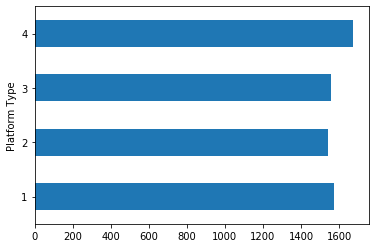

In [212]:
Complete_Dataset.groupby('Platform Type')['Time from Pickup to Arrival'].mean().plot(kind='barh')

### Clients on platform 4 have their orders delivered late. Clients on platform 2 get their deliveries faster.

#  

## Grouping by Personal or Business

In [206]:
Personal_Business_Grouped=Complete_Dataset.groupby(['Personal or Business']).mean()

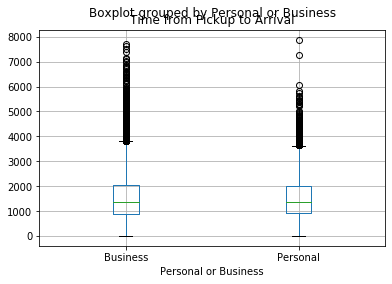

In [208]:
Complete_Dataset.boxplot(by='Personal or Business', column=['Time from Pickup to Arrival'], grid=True)

Business orders have a first quartile lower than that of personal orders. The upper quartile of Business orders is higher that that of personal orders. Lastly, Business orders have more outliers than personal orders.

In [30]:
PBG=Personal_Business_Grouped[['Personal or Business','Time from Pickup to Arrival']].sort_values('Time from Pickup to Arrival',ascending=False)

In [31]:
PBG

,Personal or Business,Time from Pickup to Arrival
1,Personal,1585.056327
0,Business,1550.743270


Business orders are delivered faster than personal orders

## Grouping by Personal or Business and Platform for Distance Covered in Delivery

In [201]:
Personal_Business_Distance=Complete_Dataset.groupby(['Personal or Business','Platform Type'], as_index=False).mean()

In [202]:
PBD=Personal_Business_Distance[['Personal or Business','Distance (KM)','Platform Type']].sort_values('Distance (KM)',ascending=False)

In [203]:
PBD

,Personal or Business,Distance (KM),Platform Type
3,Business,13.200000,4
0,Business,10.252366,1
6,Personal,9.721495,3
2,Business,9.510068,3
4,Personal,9.389617,1
5,Personal,9.127590,2
1,Business,8.888889,2


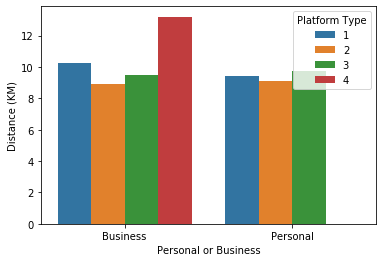

In [205]:
sns.barplot(x='Personal or Business',y='Distance (KM)',data=PBD,hue='Platform Type')

A maximum distance of 13.2 km is covered in delivering Business orders on platform 4 and 8.8km being the least distance is covered on Business orders placed on platform 2

#  

## Correlation Matrix for Data 

Selecting only numeric data 

In [37]:
Numeric_Data=Complete_Dataset._get_numeric_data()
Numeric_Data.head()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,3,9,5,9,5,9,5,9,5,9,...,NaN,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549
1,3,18,5,18,5,18,5,18,5,18,...,NaN,-1.326774,36.787807,-1.356237,36.904295,2886,1637,1309,13.8,549
2,3,31,5,31,5,31,5,31,5,31,...,NaN,-1.255189,36.782203,-1.273412,36.818206,2615,1637,1309,13.8,549
3,3,2,2,2,2,2,2,2,2,2,...,NaN,-1.290315,36.757377,-1.223520,36.802061,2986,1637,1309,13.8,549
4,2,22,2,22,2,22,2,22,2,22,...,NaN,-1.273524,36.799220,-1.300431,36.752427,1602,1637,1309,13.8,549


In [38]:
Numeric_Data.corr()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
Platform Type,1.000000,0.012764,-0.058038,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.012770,...,-0.055948,-0.002742,0.021327,0.006319,0.043924,-0.003827,0.024060,-0.074029,-0.014664,-0.031886
Placement - Day of Month,0.012764,1.000000,0.026148,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,0.999998,...,-0.204143,-0.004929,-0.005453,0.007541,0.002077,-0.014710,0.008096,-0.000107,0.012790,-0.001709
Placement - Weekday (Mo = 1),-0.058038,0.026148,1.000000,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.026132,...,-0.050592,-0.000918,0.011008,-0.004299,-0.000875,0.009693,-0.024226,-0.015475,-0.006834,-0.025747
Confirmation - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,...,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701,0.008099,-0.000114,0.012796,-0.001712
Confirmation - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,...,-0.050592,-0.000883,0.011036,-0.004251,-0.000900,0.009744,-0.024205,-0.015514,-0.006803,-0.025768
Arrival at Pickup - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,...,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701,0.008099,-0.000114,0.012796,-0.001712
Arrival at Pickup - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,...,-0.050592,-0.000883,0.011036,-0.004251,-0.000900,0.009744,-0.024205,-0.015514,-0.006803,-0.025768
Pickup - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,...,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701,0.008099,-0.000114,0.012796,-0.001712
Pickup - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,...,-0.050592,-0.000883,0.011036,-0.004251,-0.000900,0.009744,-0.024205,-0.015514,-0.006803,-0.025768
Arrival at Destination - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,...,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701,0.008099,-0.000114,0.012796,-0.001712


Plotting a heatmap to give a better presentation

Text(0.5, 1.05, 'Correlation Matrix')

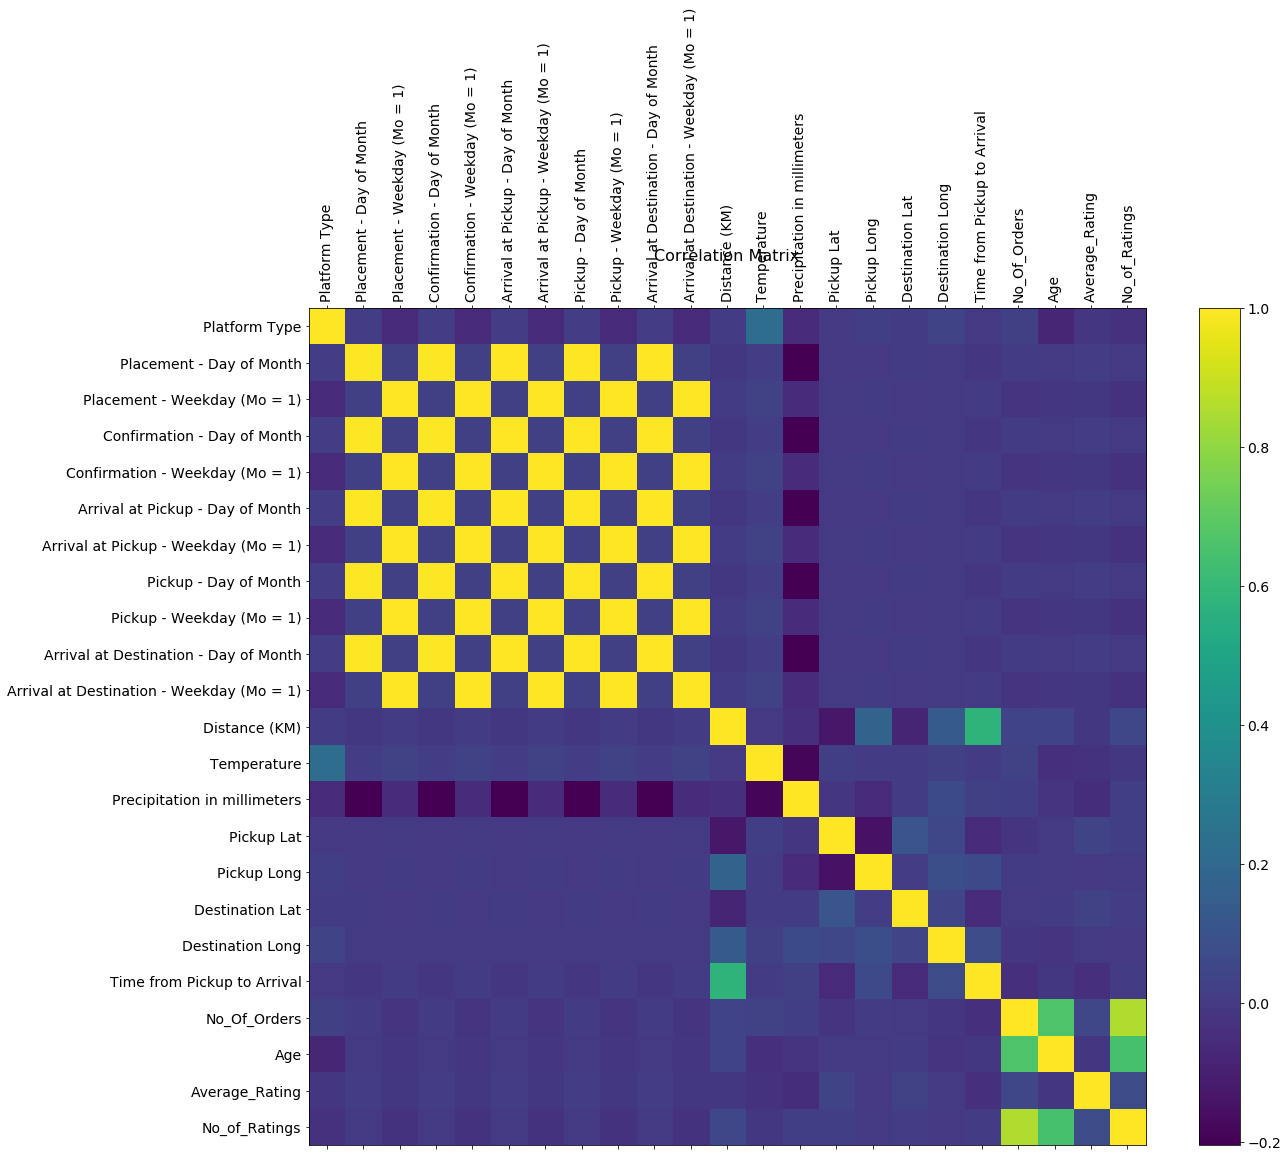

In [39]:
f=plt.figure(figsize=(19,15))
plt.matshow(Numeric_Data.corr(), fignum=f.number)
plt.xticks(range(Numeric_Data.shape[1]),Numeric_Data.columns,fontsize=14, rotation=90)
plt.yticks(range(Numeric_Data.shape[1]),Numeric_Data.columns,fontsize=14)
cb=plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

It can be seen that, placement weekday have a higher correlation with confirmation, pickup and arrival at pick up weekdays. This is same for day of month and time. Number of orders also has a high correlation with number of ratings.

#  

## Plotting a boxplot for Temperature and Precipitation

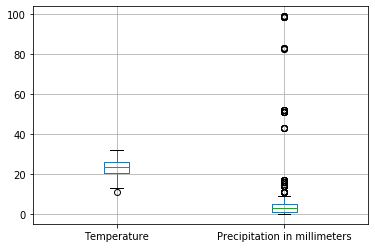

In [40]:
Numeric_Data.boxplot(column=['Temperature','Precipitation in millimeters'])

Precipitation has a lot of outliers with a first quartile of zero and a median less than 10. Temperature has a median above 20 and an upper quartile a little above 30.

## KDE plot for age, Average_Rating and Arrival at Destination - Weekday 

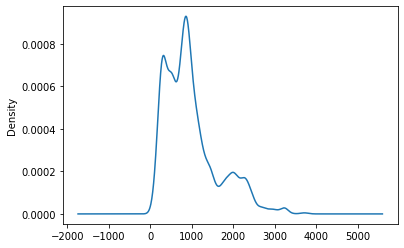

In [41]:
Numeric_Data.Age.plot.kde()

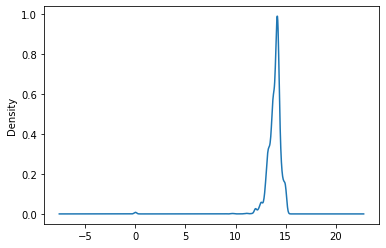

In [42]:
Numeric_Data.Average_Rating.plot.kde()

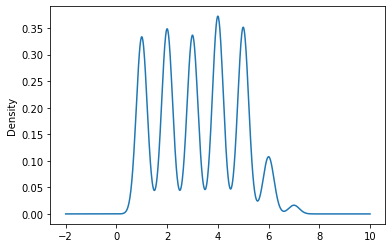

In [43]:
Numeric_Data['Arrival at Destination - Weekday (Mo = 1)'].plot.kde()

#  

## Summary Statistics for Features 

In [44]:
Complete_Dataset.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Order No,21201,21201,Order_No_13440,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
User Id,21201,3186,User_Id_393,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle Type,21201,1,Bike,21201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform Type,21201,NaN,NaN,NaN,2.75218,0.625178,1,3,3,3,4
Personal or Business,21201,2,Business,17384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Placement - Day of Month,21201,NaN,NaN,NaN,15.6537,8.79892,1,8,15,23,31
Placement - Weekday (Mo = 1),21201,NaN,NaN,NaN,3.24008,1.5673,1,2,3,5,7
Placement - Time,21201,15686,9:41:03 AM,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Confirmation - Day of Month,21201,NaN,NaN,NaN,15.6538,8.79889,1,8,15,23,31
Confirmation - Weekday (Mo = 1),21201,NaN,NaN,NaN,3.24022,1.56723,1,2,3,5,7


## Checking for missing values in the dataset 

In [45]:
Complete_Dataset.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

Temperature and Precipitation have 4,366 and 20,649 missing values respectively. The remaining features has no missing values.These missing values are for continuous features

## Representing this in Percentage

In [46]:
Complete_Dataset.isnull().mean().round(4) * 100

Order No                                      0.00
User Id                                       0.00
Vehicle Type                                  0.00
Platform Type                                 0.00
Personal or Business                          0.00
Placement - Day of Month                      0.00
Placement - Weekday (Mo = 1)                  0.00
Placement - Time                              0.00
Confirmation - Day of Month                   0.00
Confirmation - Weekday (Mo = 1)               0.00
Confirmation - Time                           0.00
Arrival at Pickup - Day of Month              0.00
Arrival at Pickup - Weekday (Mo = 1)          0.00
Arrival at Pickup - Time                      0.00
Pickup - Day of Month                         0.00
Pickup - Weekday (Mo = 1)                     0.00
Pickup - Time                                 0.00
Arrival at Destination - Day of Month         0.00
Arrival at Destination - Weekday (Mo = 1)     0.00
Arrival at Destination - Time  

For Temperature, 20.59% of its observations are missing. Precipitation has 97.4% of its data missing.

Since only 21% of temperature data is missing, we will impute it with the mean. Precipitation will be dropped because using the mean of 3.7% data to replace the missing value might not give the true representation. 

## Replacing missing values in Temperature with its mean

In [47]:
Complete_Dataset['Temperature'] = Complete_Dataset['Temperature'].fillna(Complete_Dataset['Temperature'].mean())

## Dropping Precipitation from dataset

In [48]:
Complete_Dataset=Complete_Dataset.drop(['Precipitation in millimeters'],axis=True)

#  

## Creating New Features 

#### Making a copy of the complete dataset. The complete dataset will be needed for the regression without the new features 

In [49]:
Data_With_New_Features = Complete_Dataset.copy()

In [50]:
Data_With_New_Features.shape

(21201, 32)

### Creating new feature, Placement Period of Day

Converting Placement time to a timestamp

In [51]:
from datetime import datetime
Data_With_New_Features['Placement - Time'] = Data_With_New_Features['Placement - Time'].apply(lambda x: datetime.strptime(x,'%I:%M:%S %p'))

Extracting hour of timestamp

In [52]:
Data_With_New_Features['Placement Period of day'] = Data_With_New_Features['Placement - Time'].dt.hour

Categorizing hours of the day into Morning, Afternoon and Evening

In [53]:
# Create a list to store the data
P_period=[]

# Using a for loop to populate the list
for hour in Data_With_New_Features['Placement Period of day']:
    if (hour<12):
         P_period.append('Morning')
    elif (hour>12 & hour<16):
         P_period.append('Afternoon')
    else:
         P_period.append('Evening')
            
# Storing the data as a column in Data_With_New_Features
Data_With_New_Features['Placement Period of day'] = P_period

##  Creating Confirmation Period of Day

In [54]:
Data_With_New_Features['Confirmation - Time'] = Data_With_New_Features['Confirmation - Time'].apply(lambda x: datetime.strptime(x,'%I:%M:%S %p'))
Data_With_New_Features['Confirmation Period of day'] = Data_With_New_Features['Confirmation - Time'].dt.hour
# Create a list to store the data
C_period=[]

# Using a for loop to populate the list
for hour in Data_With_New_Features['Confirmation Period of day']:
    if (hour<12):
         C_period.append('Morning')
    elif (hour>12 & hour<16):
         C_period.append('Afternoon')
    else:
         C_period.append('Evening')
            
# Storing the data as a column in Data_With_New_Features
Data_With_New_Features['Confirmation Period of day'] = C_period

## Creating Arrival at Pickup Period of Day 

In [55]:
Data_With_New_Features['Arrival at Pickup - Time'] = Data_With_New_Features['Arrival at Pickup - Time'].apply(lambda x: datetime.strptime(x,'%I:%M:%S %p'))
Data_With_New_Features['Arrival at Pickup Period of day'] = Data_With_New_Features['Arrival at Pickup - Time'].dt.hour
# Create a list to store the data
A_period=[]

# Using a for loop to populate the list
for hour in Data_With_New_Features['Arrival at Pickup Period of day']:
    if (hour<12):
         A_period.append('Morning')
    elif (hour>12 & hour<16):
         A_period.append('Afternoon')
    else:
         A_period.append('Evening')
            
# Storing the data as a column in Data_With_New_Features
Data_With_New_Features['Arrival at Pickup Period of day'] = A_period

## Creating Arrival at Destination Period of Day 

In [56]:
Data_With_New_Features['Arrival at Destination - Time'] = Data_With_New_Features['Arrival at Destination - Time'].apply(lambda x: datetime.strptime(x,'%I:%M:%S %p'))
Data_With_New_Features['Arrival at Destination Period of day'] = Data_With_New_Features['Arrival at Destination - Time'].dt.hour
# Create a list to store the data
D_period=[]

# Using a for loop to populate the list
for hour in Data_With_New_Features['Arrival at Destination Period of day']:
    if (hour<12):
         D_period.append('Morning')
    elif (hour>12 & hour<16):
         D_period.append('Afternoon')
    else:
         D_period.append('Evening')
            
# Storing the data as a column in Data_With_New_Features
Data_With_New_Features['Arrival at Destination Period of day'] = D_period

## Creating Pickup Period of Day

In [57]:
Data_With_New_Features['Pickup - Time'] = Data_With_New_Features['Pickup - Time'].apply(lambda x: datetime.strptime(x,'%I:%M:%S %p'))
Data_With_New_Features['Pickup Period of day'] = Data_With_New_Features['Pickup - Time'].dt.hour
# Create a list to store the data
Pk_period=[]

# Using a for loop to populate the list
for hour in Data_With_New_Features['Pickup Period of day']:
    if (hour<12):
         Pk_period.append('Morning')
    elif (hour>12 & hour<16):
         Pk_period.append('Afternoon')
    else:
         Pk_period.append('Evening')
            
# Storing the data as a column in Data_With_New_Features
Data_With_New_Features['Pickup Period of day'] = Pk_period

## Categorizing days into Weekdays and Weekends for Day Variables

In [58]:
Data_With_New_Features['Placement day'] = np.where(Data_With_New_Features['Placement - Weekday (Mo = 1)']<6, 'Weekday', 'Weekend')
Data_With_New_Features['Confirmation day'] = np.where(Data_With_New_Features['Confirmation - Weekday (Mo = 1)']<6, 'Weekday', 'Weekend')
Data_With_New_Features['Pickup day'] = np.where(Data_With_New_Features['Pickup - Weekday (Mo = 1)']<6, 'Weekday', 'Weekend')
Data_With_New_Features['Arrival at Destination day'] = np.where(Data_With_New_Features['Arrival at Destination - Weekday (Mo = 1)']<6, 'Weekday', 'Weekend')
Data_With_New_Features['Arrival at Pickup day'] = np.where(Data_With_New_Features['Arrival at Pickup - Weekday (Mo = 1)']<6, 'Weekday', 'Weekend')

## Computing for proximity of The Nairobi Central Business District to the Pick up and Destination points

### For Pick up point

In [59]:
# importing geodesic from geopy 
from geopy.distance import geodesic

#Creating a column for CBD proximity and populating it with Nan
Data_With_New_Features['CBD Proximity to Pickup Point']=np.nan

# Latitude and longitude for Central Business District (Taken online)
CBD=(-1.299719,36.816097)

# Iterating through Data to compute for Distance(km)
for i, row in Data_With_New_Features.iterrows():
    Data_With_New_Features.loc[i, 'CBD Proximity to Pickup Point'] = geodesic((Data_With_New_Features.loc[i, 'Pickup Lat'],Data_With_New_Features.loc[i, 'Pickup Long']),CBD).km 

### For Destination

In [60]:
# importing geodesic from geopy 
from geopy.distance import geodesic

#Creating a column for CBD proximity and populating it with Nan
Data_With_New_Features['CBD Proximity to Destination']=np.nan

# Latitude and longitude for Central Business District (Taken online)
CBD=(-1.299719,36.816097)

# Iterating through Data to compute for Distance(km)
for i, row in Data_With_New_Features.iterrows():
    Data_With_New_Features.loc[i, 'CBD Proximity to Destination'] = geodesic((Data_With_New_Features.loc[i, 'Destination Lat'],Data_With_New_Features.loc[i, 'Destination Long']),CBD).km

## Categorizing Temperature into favourable and unfavourable (20-29 Degree Celcius being favourable)

In [61]:
Temp_Cat=[]

# Using a for loop to populate the list
for temp in Data_With_New_Features['Temperature']:
    if (temp>20 and temp<29):
         Temp_Cat.append('Favourable')
    else:
         Temp_Cat.append('Unfavourable')

# Storing the data as a column in Data_With_New_Features
Data_With_New_Features['Temperature Condition'] = Temp_Cat

## Categorizing Day of month into 1st, 2nd, 3rd and 4th week

### For Placement Day of Month 

In [62]:
# Create a list to store the data
PDM=[]

# Using a for loop to populate the list
for day in Data_With_New_Features['Placement - Day of Month']:
    if (day>0 and day<8):
        PDM.append('Week One')        
    elif (day>7 and day<16):
        PDM.append('Week Two')
    elif (day>15 and day<24):
        PDM.append('Week Three')
    else:
        PDM.append('Week Four')
            
# Storing the data as a column in Data_With_New_Features
Data_With_New_Features['Placement Week'] = PDM

### For Confirmation Day of Month 

In [63]:
# Create a list to store the data
CDM=[]

# Using a for loop to populate the list
for day in Data_With_New_Features['Confirmation - Day of Month']:
    if (day>0 and day<8):
        CDM.append('Week One')        
    elif (day>7 and day<16):
        CDM.append('Week Two')
    elif (day>15 and day<24):
        CDM.append('Week Three')
    else:
        CDM.append('Week Four')
            
# Storing the data as a column in Data_With_New_Features
Data_With_New_Features['Confirmation Week'] = CDM

### For Arrival at Pickup Day of Month 

In [64]:
# Create a list to store the data
ADM=[]

# Using a for loop to populate the list
for day in Data_With_New_Features['Arrival at Pickup - Day of Month']:
    if (day>0 and day<8):
        ADM.append('Week One')        
    elif (day>7 and day<16):
        ADM.append('Week Two')
    elif (day>15 and day<24):
        ADM.append('Week Three')
    else:
        ADM.append('Week Four')
            
# Storing the data as a column in Data_With_New_Features
Data_With_New_Features['Arrival at Pickup Week'] = ADM

### For Pickup Day of Month 

In [65]:
# Create a list to store the data
PkDM=[]

# Using a for loop to populate the list
for day in Data_With_New_Features['Pickup - Day of Month']:
    if (day>0 and day<8):
        PkDM.append('Week One')        
    elif (day>7 and day<16):
        PkDM.append('Week Two')
    elif (day>15 and day<24):
        PkDM.append('Week Three')
    else:
        PkDM.append('Week Four')
            
# Storing the data as a column in Data_With_New_Features
Data_With_New_Features['Pickup Week'] = PkDM

## For Arrival at Destination Day of Month 

In [66]:
# Create a list to store the data
AdDM=[]

# Using a for loop to populate the list
for day in Data_With_New_Features['Arrival at Destination - Day of Month']:
    if (day>0 and day<8):
        AdDM.append('Week One')        
    elif (day>7 and day<16):
        AdDM.append('Week Two')
    elif (day>15 and day<24):
        AdDM.append('Week Three')
    else:
        AdDM.append('Week Four')
            
# Storing the data as a column in Data_With_New_Features
Data_With_New_Features['Arrival at Destination Week'] = AdDM

### Checking to see the average delivery time for weekdays and weekends for Placement of order

In [67]:
Weekend_Weekday_Grouped=Data_With_New_Features.groupby(['Placement day'], as_index=False).mean()
Weekend_Weekday_Grouped[['Placement day','Time from Pickup to Arrival']].sort_values('Time from Pickup to Arrival',ascending=False)

,Placement day,Time from Pickup to Arrival
0,Weekday,1562.609337
1,Weekend,1477.017033


From the table above, orders placed on Weekends are delivered faster as compared to order placements made on weekdays.

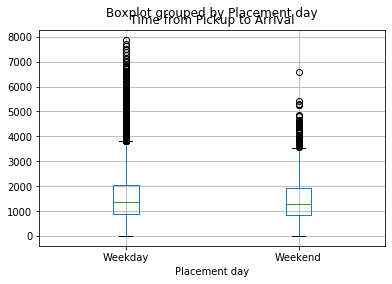

In [217]:
Data_With_New_Features.boxplot(by='Placement day', column=['Time from Pickup to Arrival'], grid=True)

The boxplot above shows the ETA for placements made on weekdays and weekends. Weekday ETAs have more outliers as compared to Weekend ETAs.

## Checking to see the average delivery time for weeks of month for pick ups

In [213]:
Pickup_Week_Grouped=Data_With_New_Features.groupby(['Pickup Week'], as_index=True).mean()
Pickup_Week_Grouped[['Time from Pickup to Arrival']].sort_values('Time from Pickup to Arrival',ascending=False)

,Time from Pickup to Arrival
Pickup Week,
Week Two,1589.452235
Week One,1558.922781
Week Three,1544.737104
Week Four,1529.274536


In [69]:
Placement_Day_Period_Grouped=Data_With_New_Features.groupby(['Placement Period of day'], as_index=False).mean()
Placement_Day_Period_Grouped[['Placement Period of day','Time from Pickup to Arrival']].sort_values('Time from Pickup to Arrival',ascending=False)

,Placement Period of day,Time from Pickup to Arrival
1,Evening,1590.595861
0,Afternoon,1555.835951
2,Morning,1547.357776


Orders placed in the evening are delivered later than other periods of the day. Morning orders has the least ETA.

## Calculating the average number of orders delivered by a rider in a day 

In [70]:
Data_With_New_Features['Average Daily Orders By Rider']=Data_With_New_Features['No_Of_Orders']/Data_With_New_Features['Age']

## Calculating Time in Seconds between Placement And Confirmation 

In [71]:
Data_With_New_Features['Time from Placement to Confirmation']=(Data_With_New_Features['Confirmation - Time']-Data_With_New_Features['Placement - Time'])

In [72]:
for i, row in Data_With_New_Features.iterrows():
    Data_With_New_Features.loc[i, 'Time from Placement to Confirmation'] = (Data_With_New_Features.loc[i, 'Time from Placement to Confirmation']).seconds

## Calculating Time in Seconds between Confirmation And Pickup 

In [73]:
Data_With_New_Features['Time from Confirmation to Pickup']=(Data_With_New_Features['Pickup - Time']-Data_With_New_Features['Confirmation - Time'])

for i, row in Data_With_New_Features.iterrows():
    Data_With_New_Features.loc[i, 'Time from Confirmation to Pickup'] = (Data_With_New_Features.loc[i, 'Time from Confirmation to Pickup']).seconds

## Calculating Time in Seconds between Placement And Pickup

In [74]:
Data_With_New_Features['Time from Placement to Pickup']=(Data_With_New_Features['Pickup - Time']-Data_With_New_Features['Placement - Time'])

for i, row in Data_With_New_Features.iterrows():
    Data_With_New_Features.loc[i, 'Time from Placement to Pickup'] = (Data_With_New_Features.loc[i, 'Time from Placement to Pickup']).seconds

## Regression Analysis 

### Without New Features 

#### Dropping order Id, User Id, Vehicle type, Rider Id, all time data  and all latitude and longitude data

In [75]:
Data_without_New_Features=Complete_Dataset.drop(["Order No", "User Id","Vehicle Type","Rider Id","Placement - Time", "Confirmation - Time", "Arrival at Pickup - Time", "Pickup - Time", "Arrival at Destination - Time","Pickup Lat", "Pickup Long", "Destination Lat", "Destination Long"], axis = 1)              

### One hot encoding all object variables in the data without new features

##### Selecting object data for encoding 

In [76]:
Object_Data_without_New_Features=Data_without_New_Features['Personal or Business']

#### Encoding Object Data 

In [77]:
Dummies_Data_without_New_Features= pd.get_dummies(Object_Data_without_New_Features)

In [78]:
Dummies_Data_without_New_Features.head()

,Business,Personal
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


#### Merging encoded data with original data

In [79]:
Data_without_New_Features = pd.concat([Data_without_New_Features, Dummies_Data_without_New_Features], axis=1)

#### Removing all object variables/features from data.

This is done because, object variables/features cannot be used in the regression model and also, it has already been encoded.

In [80]:
Reg_Data_without_New_Features = Data_without_New_Features.select_dtypes(exclude=['object'])

#### Splitting data into target and independent variables 

In [81]:
Y_Reg_Data_without_New_Features=Reg_Data_without_New_Features["Time from Pickup to Arrival"]
X_Reg_Data_without_New_Features=Reg_Data_without_New_Features.drop(['Time from Pickup to Arrival'], axis = 1)

#### Importing Scikit Learn Dependencies 

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#### Splitting Data into 80% train and 20% test with a random seed of 42 

In [83]:
x_Train, x_Test, y_Train, y_Test = train_test_split(X_Reg_Data_without_New_Features, Y_Reg_Data_without_New_Features, test_size = 0.2, random_state = 42)

#### Fitting regression model with train data

In [84]:
reg=LinearRegression()
reg.fit(x_Train,y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Printing Coeffiecient for each feature used in model 

In [85]:
reg.coef_

array([ 1.54372314e+01, -2.07793989e+02, -2.07045894e+02,  5.14824313e+01,
        5.22305267e+01,  5.14824313e+01,  5.22305267e+01,  5.14824313e+01,
        5.22305267e+01,  5.14824313e+01,  5.22305267e+01,  1.00401138e+02,
        3.79155296e+00, -1.06162480e-01,  9.26262985e-03, -4.25214760e+01,
        2.85842057e-01, -2.16635052e+01,  2.16635052e+01])

#### Making prediction on the test dataset

In [86]:
y_Pred = reg.predict(x_Test) 

#### Calculating MSE for the model 

In [87]:
Old_Features_Model_MSE=mean_squared_error(y_Test,y_Pred)
Old_Features_Model_RMSE=np.sqrt(Old_Features_Model_MSE)

In [88]:
Old_Features_Model_RMSE

789.8542403175238

In [89]:
Old_Features_Model_MSE

623869.7209475726

#  

### Model With Engineered Features 

#### Dropping order Id, User Id, Vehicle type, Rider Id and all time data 

In [90]:
New_Features_Data=Data_With_New_Features.drop(["Order No", "User Id","Vehicle Type","Rider Id","Placement - Time", "Confirmation - Time", "Arrival at Pickup - Time", "Pickup - Time", "Arrival at Destination - Time"], axis = 1)   

#### Selecting Object Data for Encoding

In [91]:
Object_New_Features_Data = New_Features_Data.select_dtypes(include=['object'])

#### Encoding Object Variable/Features 

In [92]:
Dummies_Object_New_Features_Data= pd.get_dummies(Object_New_Features_Data)

#### Joining Encoded data with original data 

In [93]:
New_Features_Ready_Data = pd.concat([New_Features_Data, Dummies_Object_New_Features_Data], axis=1)

#### Excluding Object Variables 

In [94]:
Reg_Data_with_Eng_Features = New_Features_Ready_Data.select_dtypes(exclude=['object'])

#### Selecting target and dependent variables 

In [95]:
Y_Reg_Data_with_Eng_Features=Reg_Data_with_Eng_Features["Time from Pickup to Arrival"]
X_Reg_Data_with_Eng_Features=Reg_Data_with_Eng_Features.drop(['Time from Pickup to Arrival'], axis = 1)

#### Splitting Data into 80% train and 20% test with a random seed of 42

In [96]:
x_Eng_Train, x_Eng_Test, y_Eng_Train, y_Eng_Test = train_test_split(X_Reg_Data_with_Eng_Features, Y_Reg_Data_with_Eng_Features, test_size = 0.2, random_state = 42)

#### Fittting  Model 

In [97]:
Eng_reg=LinearRegression()
Eng_reg.fit(x_Eng_Train,y_Eng_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Printing Coefficients for each feature 

In [98]:
Eng_reg.coef_

array([ 1.24995514e+01,  2.38659530e+12, -2.38659530e+12, -1.16869772e+12,
       -2.25968855e+12, -3.86058934e+11, -9.26063722e+11, -9.61660681e+11,
        5.87927433e+12,  1.29822032e+11, -3.06926758e+11,  1.12973648e+02,
       -7.44384766e+00,  8.03847575e+02, -9.09447147e+02,  2.10846404e+02,
       -3.36311892e+02, -1.41601562e-01,  6.61468506e-02, -9.12096405e+01,
        2.86743164e-01, -1.93486328e+01, -2.67410889e+01,  5.29909668e+01,
        0.00000000e+00, -7.08007812e-02,  2.36816406e-02,  1.96442413e+09,
        1.96442416e+09,  2.18645065e+08,  2.18645282e+08,  2.18645453e+08,
        7.14425322e+07,  7.14425292e+07,  7.14428248e+07,  3.07870302e+08,
        3.07870087e+08,  3.07869948e+08,  3.50401266e+06,  3.50312912e+06,
        3.50252324e+06, -2.29475261e+07, -2.29472067e+07, -2.29465393e+07,
        5.61967015e+08,  1.13314819e+09,  6.46573097e+08,  1.13314819e+09,
        1.60793669e+09,  1.25535124e+09,  1.60793669e+09,  1.25535124e+09,
        1.60793669e+09,  

#### Making Prediction for test data 

In [99]:
y_Reg_Pred = Eng_reg.predict(x_Eng_Test) 

####  Calculating the MSE for the engineered feature model

In [100]:
Engineered_Features_Model_MSE=mean_squared_error(y_Eng_Test,y_Reg_Pred)
Engineered_Features_Model_RMSE=np.sqrt(Engineered_Features_Model_MSE)

In [101]:
Engineered_Features_Model_RMSE

767.2871667245657

In [102]:
Engineered_Features_Model_MSE

588729.5962202115

After the new features were engineered, the MSE reduced from 623,869.72 to  586,031.03

#  

# Feature Selection 

### Recursive Feature Elimination 

In [103]:
from sklearn.feature_selection import RFE

#Number of features that will optimize the model
nof_list=np.arange(1,76)
high_score=0
#Initializing list to store optimum features
nof=0
score_list=[]
for n in range (len(nof_list)):
    X_RFE_Train,X_RFE_Test,Y_RFE_Train,Y_RFE_Test=train_test_split(X_Reg_Data_with_Eng_Features,Y_Reg_Data_with_Eng_Features,test_size=0.2, random_state=0)
    model=LinearRegression()
    rfe=RFE(model,nof_list[n])
    X_RFE_Train=rfe.fit_transform(X_RFE_Train,Y_RFE_Train)
    X_RFE_Test=rfe.transform(X_RFE_Test)
    model.fit(X_RFE_Train,Y_RFE_Train)
    score=model.score(X_RFE_Test,Y_RFE_Test)
    score_list.append(score)
    if (score>high_score):
        high_score=score
        nof=nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" %(nof,high_score)) 
    

Optimum number of features: 73
Score with 73 features: 0.384741


In [104]:
cols=list(X_Reg_Data_with_Eng_Features)
model=LinearRegression()

#Initializing RFE model
rfe=RFE(model,76)

#Tranform Data using RFE 
X_rfe=rfe.fit_transform(X_Reg_Data_with_Eng_Features,Y_Reg_Data_with_Eng_Features)

#Fitting Data to Model
model.fit(X_rfe,Y_Reg_Data_with_Eng_Features)
temp=pd.Series(rfe.support_,index=cols)
Selected_features_rfe=temp[temp==True].index
print(Selected_features_rfe)

Index(['Platform Type', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)', 'Distance (KM)',
       'Temperature', 'Pickup Lat', 'Pickup Long', 'Destination Lat',
       'Destination Long', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings', 'CBD Proximity to Pickup Point',
       'CBD Proximity to Destination', 'Average Daily Orders By Rider',
       'Time from Placement to Confirmation',
       'Time from Confirmation to Pickup', 'Time from Placement to Pickup',
       'Personal or Business_Business', 'Personal or Business_Personal',
       'Placement Period of day_Afternoon', 'Placement Period of day_Evening',
       'Placement Period of day_Morning',

### Selecting features given by RFE 

In [105]:
Final_Feature_Data=Reg_Data_with_Eng_Features[['Platform Type', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)', 'Distance (KM)',
       'Temperature', 'Pickup Lat', 'Pickup Long', 'Destination Lat',
       'Destination Long', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings', 'CBD Proximity to Pickup Point',
       'CBD Proximity to Destination', 'Average Daily Orders By Rider',
       'Time from Placement to Confirmation',
       'Time from Confirmation to Pickup', 'Time from Placement to Pickup',
       'Personal or Business_Business', 'Personal or Business_Personal',
       'Placement Period of day_Afternoon', 'Placement Period of day_Evening',
       'Placement Period of day_Morning',
       'Confirmation Period of day_Afternoon',
       'Confirmation Period of day_Evening',
       'Confirmation Period of day_Morning',
       'Arrival at Pickup Period of day_Afternoon',
       'Arrival at Pickup Period of day_Evening',
       'Arrival at Pickup Period of day_Morning',
       'Arrival at Destination Period of day_Afternoon',
       'Arrival at Destination Period of day_Evening',
       'Arrival at Destination Period of day_Morning',
       'Pickup Period of day_Afternoon', 'Pickup Period of day_Evening',
       'Pickup Period of day_Morning', 'Placement day_Weekday',
       'Placement day_Weekend', 'Confirmation day_Weekday',
       'Confirmation day_Weekend', 'Pickup day_Weekday', 'Pickup day_Weekend',
       'Arrival at Destination day_Weekday',
       'Arrival at Destination day_Weekend', 'Arrival at Pickup day_Weekday',
       'Arrival at Pickup day_Weekend', 'Temperature Condition_Favourable',
       'Temperature Condition_Unfavourable', 'Placement Week_Week Four',
       'Placement Week_Week One', 'Placement Week_Week Three',
       'Placement Week_Week Two', 'Confirmation Week_Week Four',
       'Confirmation Week_Week One', 'Confirmation Week_Week Three',
       'Confirmation Week_Week Two', 'Arrival at Pickup Week_Week Four',
       'Arrival at Pickup Week_Week One', 'Arrival at Pickup Week_Week Three',
       'Arrival at Pickup Week_Week Two', 'Pickup Week_Week Four',
       'Pickup Week_Week One', 'Pickup Week_Week Three',
       'Pickup Week_Week Two', 'Arrival at Destination Week_Week Four',
       'Arrival at Destination Week_Week One',
       'Arrival at Destination Week_Week Three',
       'Arrival at Destination Week_Week Two','Time from Pickup to Arrival'
]]

In [106]:
### Dividing Data into dependent and independent variables

Y_Selected_Feature_Data=Final_Feature_Data["Time from Pickup to Arrival"]
X_Selected_Feature_Data=Final_Feature_Data.drop(['Time from Pickup to Arrival'], axis = 1)

#### Splitting Data into 80% train and 20% test with a random seed of 42

x_Used_Train, x_Used_Test, y_Used_Train, y_Used_Test = train_test_split(X_Selected_Feature_Data, Y_Selected_Feature_Data, test_size = 0.2, random_state = 42)

#### Fittting  Model 

Used_reg=LinearRegression()
Used_reg.fit(x_Used_Train,y_Used_Train)

#### Printing Coefficients for each feature 

Used_reg.coef_

#### Making Prediction for test data 

y_Used_Pred = Used_reg.predict(x_Used_Test) 

####  Calculating the MSE for the engineered feature model

Used_Data_MSE=mean_squared_error(y_Used_Test,y_Used_Pred)

Used_Data_MSE

588729.5962202115

### Ridge 

In [107]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.01)
ridge.fit(x_Used_Train,y_Used_Train) 
pred_train_ridge= ridge.predict(x_Used_Test)

In [108]:
Ridge_MSE=mean_squared_error(y_Used_Test,pred_train_ridge)
Ridge_RMSE=np.sqrt(Ridge_MSE)

In [109]:
Ridge_RMSE

762.4683075405545

In [110]:
Ridge_MSE

581357.9200037576

#  

## Lasso 

In [111]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(x_Used_Train,y_Used_Train) 
pred_train_lasso= lasso_model.predict(x_Used_Test)

C:\Users\me\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3616839424.0618773, tolerance: 1652103.287448962
  positive)


In [112]:
Lasso_MSE=mean_squared_error(y_Used_Test,pred_train_lasso)
Lasso_RMSE=np.sqrt(Lasso_MSE)

In [113]:
Lasso_RMSE

762.4538512628618

In [114]:
Lasso_MSE

581335.8753055702

#  

### Elastic Regression 

In [115]:
from sklearn.linear_model import ElasticNet
elastic_model = ElasticNet(alpha=0.01)
elastic_model.fit(x_Used_Train,y_Used_Train) 
pred_train_elastic= elastic_model.predict(x_Used_Test)

C:\Users\me\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4088769005.2502527, tolerance: 1652103.287448962
  positive)


In [116]:
Elastic_MSE=mean_squared_error(y_Used_Test,pred_train_elastic)
Elastic_RMSE=np.sqrt(Elastic_MSE)

In [117]:
Elastic_RMSE

763.229871329746

In [118]:
Elastic_MSE

582519.8364900206

### Creating Table to Show the Various Methods and their MSE

In [119]:
data=[['Without Engineered Features',Old_Features_Model_RMSE,Old_Features_Model_MSE],
      [ 'With Engineered Features',Engineered_Features_Model_RMSE,Engineered_Features_Model_MSE],
      [ 'Ridge',Ridge_RMSE,Ridge_MSE],
      [ 'Lasso',Lasso_RMSE,Lasso_MSE],
      [ 'Elastic Regression',Elastic_RMSE,Elastic_MSE] 
]

Method_Summary=pd.DataFrame(data)

In [120]:
Method_Summary.columns=['Method','RMSE','MSE']

In [121]:
Method_Summary.sort_values(by='RMSE')

,Method,RMSE,MSE
3,Lasso,762.453851,581335.875306
2,Ridge,762.468308,581357.920004
4,Elastic Regression,763.229871,582519.836490
1,With Engineered Features,767.287167,588729.596220
0,Without Engineered Features,789.854240,623869.720948


## Training for 100% of the model 

### Readying Test Data by Computing All Needed/New Features  

In [122]:
Test_Data=pd.read_csv("Test.csv")

### Merging Datasets

In [123]:
Complete_Test_Data=Test_Data.merge(Riders_Data, on='Rider Id')

### Setting Rider ID as index 

In [124]:
Complete_Test_Data.set_index('Order No',inplace=True)

### Imputing Temperature Missing Values with Mean 

In [125]:
Complete_Test_Data['Temperature'] = Complete_Test_Data['Temperature'].fillna(Complete_Test_Data['Temperature'].mean())

## Dropping Precipitation from dataset

In [126]:
Complete_Test_Data=Complete_Test_Data.drop(['Precipitation in millimeters'],axis=True)

#  

## Creating New Features 

### Creating new feature, Placement Period of Day

Converting Placement time to a timestamp

In [127]:
Complete_Test_Data['Placement - Time'] = Complete_Test_Data['Placement - Time'].apply(lambda x: datetime.strptime(x,'%I:%M:%S %p'))

Extracting hour of timestamp

In [128]:
Complete_Test_Data['Placement Period of day'] = Complete_Test_Data['Placement - Time'].dt.hour

Categorizing hours of the day into Morning, Afternoon and Evening

In [129]:
# Create a list to store the data
P_period=[]

# Using a for loop to populate the list
for hour in Complete_Test_Data['Placement Period of day']:
    if (hour<12):
         P_period.append('Morning')
    elif (hour>12 & hour<16):
         P_period.append('Afternoon')
    else:
         P_period.append('Evening')
            
# Storing the data as a column in Data_With_New_Features
Complete_Test_Data['Placement Period of day'] = P_period

##  Creating Confirmation Period of Day

In [130]:
Complete_Test_Data['Confirmation - Time'] = Complete_Test_Data['Confirmation - Time'].apply(lambda x: datetime.strptime(x,'%I:%M:%S %p'))
Complete_Test_Data['Confirmation Period of day'] = Complete_Test_Data['Confirmation - Time'].dt.hour
# Create a list to store the data
C_period=[]

# Using a for loop to populate the list
for hour in Complete_Test_Data['Confirmation Period of day']:
    if (hour<12):
         C_period.append('Morning')
    elif (hour>12 & hour<16):
         C_period.append('Afternoon')
    else:
         C_period.append('Evening')
            
# Storing the data as a column in Data_With_New_Features
Complete_Test_Data['Confirmation Period of day'] = C_period

## Creating Arrival at Pickup Period of Day 

In [131]:
Complete_Test_Data['Arrival at Pickup - Time'] = Complete_Test_Data['Arrival at Pickup - Time'].apply(lambda x: datetime.strptime(x,'%I:%M:%S %p'))
Complete_Test_Data['Arrival at Pickup Period of day'] = Complete_Test_Data['Arrival at Pickup - Time'].dt.hour
# Create a list to store the data
A_period=[]

# Using a for loop to populate the list
for hour in Complete_Test_Data['Arrival at Pickup Period of day']:
    if (hour<12):
         A_period.append('Morning')
    elif (hour>12 & hour<16):
         A_period.append('Afternoon')
    else:
         A_period.append('Evening')
            
# Storing the data as a column in Data_With_New_Features
Complete_Test_Data['Arrival at Pickup Period of day'] = A_period

## Creating Pickup Period of Day

In [132]:
Complete_Test_Data['Pickup - Time'] = Complete_Test_Data['Pickup - Time'].apply(lambda x: datetime.strptime(x,'%I:%M:%S %p'))
Complete_Test_Data['Pickup Period of day'] = Complete_Test_Data['Pickup - Time'].dt.hour
# Create a list to store the data
Pk_period=[]

# Using a for loop to populate the list
for hour in Complete_Test_Data['Pickup Period of day']:
    if (hour<12):
         Pk_period.append('Morning')
    elif (hour>12 & hour<16):
         Pk_period.append('Afternoon')
    else:
         Pk_period.append('Evening')
            
# Storing the data as a column in Data_With_New_Features
Complete_Test_Data['Pickup Period of day'] = Pk_period

## Categorizing days into Weekdays and Weekends for Day Variables

In [133]:
Complete_Test_Data['Placement day'] = np.where(Complete_Test_Data['Placement - Weekday (Mo = 1)']<6, 'Weekday', 'Weekend')
Complete_Test_Data['Confirmation day'] = np.where(Complete_Test_Data['Confirmation - Weekday (Mo = 1)']<6, 'Weekday', 'Weekend')
Complete_Test_Data['Pickup day'] = np.where(Complete_Test_Data['Pickup - Weekday (Mo = 1)']<6, 'Weekday', 'Weekend')
Complete_Test_Data['Arrival at Pickup day'] = np.where(Complete_Test_Data['Arrival at Pickup - Weekday (Mo = 1)']<6, 'Weekday', 'Weekend')

## Computing for proximity of The Nairobi Central Business District to the Pick up and Destination points

### For Pick up point

In [134]:
# importing geodesic from geopy 
from geopy.distance import geodesic

#Creating a column for CBD proximity and populating it with Nan
Complete_Test_Data['CBD Proximity to Pickup Point']=np.nan

# Latitude and longitude for Central Business District (Taken online)
CBD=(-1.299719,36.816097)

# Iterating through Data to compute for Distance(km)
for i, row in Complete_Test_Data.iterrows():
    Complete_Test_Data.loc[i, 'CBD Proximity to Pickup Point'] = geodesic((Complete_Test_Data.loc[i, 'Pickup Lat'],Complete_Test_Data.loc[i, 'Pickup Long']),CBD).km 

### For Destination

In [135]:
# importing geodesic from geopy 
from geopy.distance import geodesic

#Creating a column for CBD proximity and populating it with Nan
Complete_Test_Data['CBD Proximity to Destination']=np.nan

# Latitude and longitude for Central Business District (Taken online)
CBD=(-1.299719,36.816097)

# Iterating through Data to compute for Distance(km)
for i, row in Complete_Test_Data.iterrows():
    Complete_Test_Data.loc[i, 'CBD Proximity to Destination'] = geodesic((Complete_Test_Data.loc[i, 'Destination Lat'],Complete_Test_Data.loc[i, 'Destination Long']),CBD).km

## Categorizing Temperature into favourable and unfavourable (20-29 Degree Celcius being favourable)

In [136]:
Temp_Cat=[]

# Using a for loop to populate the list
for temp in Complete_Test_Data['Temperature']:
    if (temp>20 and temp<29):
         Temp_Cat.append('Favourable')
    else:
         Temp_Cat.append('Unfavourable')

# Storing the data as a column in Data_With_New_Features
Complete_Test_Data['Temperature Condition'] = Temp_Cat

## Categorizing Day of month into 1st, 2nd, 3rd and 4th week

### For Placement Day of Month 

In [137]:
# Create a list to store the data
PDM=[]

# Using a for loop to populate the list
for day in Complete_Test_Data['Placement - Day of Month']:
    if (day>0 and day<8):
        PDM.append('Week One')        
    elif (day>7 and day<16):
        PDM.append('Week Two')
    elif (day>15 and day<24):
        PDM.append('Week Three')
    else:
        PDM.append('Week Four')
            
# Storing the data as a column in Data_With_New_Features
Complete_Test_Data['Placement Week'] = PDM

### For Confirmation Day of Month 

In [138]:
# Create a list to store the data
CDM=[]

# Using a for loop to populate the list
for day in Complete_Test_Data['Confirmation - Day of Month']:
    if (day>0 and day<8):
        CDM.append('Week One')        
    elif (day>7 and day<16):
        CDM.append('Week Two')
    elif (day>15 and day<24):
        CDM.append('Week Three')
    else:
        CDM.append('Week Four')
            
# Storing the data as a column in Data_With_New_Features
Complete_Test_Data['Confirmation Week'] = CDM

### For Arrival at Pickup Day of Month 

In [139]:
# Create a list to store the data
ADM=[]

# Using a for loop to populate the list
for day in Complete_Test_Data['Arrival at Pickup - Day of Month']:
    if (day>0 and day<8):
        ADM.append('Week One')        
    elif (day>7 and day<16):
        ADM.append('Week Two')
    elif (day>15 and day<24):
        ADM.append('Week Three')
    else:
        ADM.append('Week Four')
            
# Storing the data as a column in Data_With_New_Features
Complete_Test_Data['Arrival at Pickup Week'] = ADM

### For Pickup Day of Month 

In [140]:
# Create a list to store the data
PkDM=[]

# Using a for loop to populate the list
for day in Complete_Test_Data['Pickup - Day of Month']:
    if (day>0 and day<8):
        PkDM.append('Week One')        
    elif (day>7 and day<16):
        PkDM.append('Week Two')
    elif (day>15 and day<24):
        PkDM.append('Week Three')
    else:
        PkDM.append('Week Four')
            
# Storing the data as a column in Data_With_New_Features
Complete_Test_Data['Pickup Week'] = PkDM

## For Arrival at Destination Day of Month 

## Calculating the average number of orders delivered by a rider in a day 

In [141]:
Complete_Test_Data['Average Daily Orders By Rider']=Complete_Test_Data['No_Of_Orders']/Complete_Test_Data['Age']

## Calculating Time in Seconds between Placement And Confirmation 

In [142]:
Complete_Test_Data['Time from Placement to Confirmation']=(Complete_Test_Data['Confirmation - Time']-Complete_Test_Data['Placement - Time'])

In [143]:
for i, row in Complete_Test_Data.iterrows():
    Complete_Test_Data.loc[i, 'Time from Placement to Confirmation'] = (Complete_Test_Data.loc[i, 'Time from Placement to Confirmation']).seconds

## Calculating Time in Seconds between Confirmation And Pickup 

In [144]:
Complete_Test_Data['Time from Confirmation to Pickup']=(Complete_Test_Data['Pickup - Time']-Complete_Test_Data['Confirmation - Time'])

In [145]:
for i, row in Complete_Test_Data.iterrows():
    Complete_Test_Data.loc[i, 'Time from Confirmation to Pickup'] = (Complete_Test_Data.loc[i, 'Time from Confirmation to Pickup']).seconds

## Calculating Time in Seconds between Placement And Pickup

In [146]:
Complete_Test_Data['Time from Placement to Pickup']=(Complete_Test_Data['Pickup - Time']-Complete_Test_Data['Placement - Time'])

for i, row in Complete_Test_Data.iterrows():
    Complete_Test_Data.loc[i, 'Time from Placement to Pickup'] = (Complete_Test_Data.loc[i, 'Time from Placement to Pickup']).seconds

## Dropping features not in test data

In [147]:
Full_Train=Reg_Data_with_Eng_Features.drop(['Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)','Arrival at Destination Period of day_Afternoon',
       'Arrival at Destination Period of day_Evening',
       'Arrival at Destination Period of day_Morning','Arrival at Destination day_Weekday',
       'Arrival at Destination day_Weekend','Arrival at Destination Week_Week Four',
       'Arrival at Destination Week_Week One',
       'Arrival at Destination Week_Week Three',
       'Arrival at Destination Week_Week Two'], axis = 1)

### Splitting Train Data into Target and Independent Variables 

In [148]:
X_Full_Train=Full_Train.drop(['Time from Pickup to Arrival'], axis = 1)
Y_Full_Train=Full_Train['Time from Pickup to Arrival']

### Recursive Feature Elimination

### Features that will optimize model

In [149]:
cols=list(X_Full_Train)
model=LinearRegression()

#Initializing RFE model
rfe=RFE(model,65)

#Tranform Data using RFE 
X_rfe=rfe.fit_transform(X_Full_Train,Y_Full_Train)

#Fitting Data to Model
model.fit(X_rfe,Y_Full_Train)
temp=pd.Series(rfe.support_,index=cols)
Selected_reg_features_rfe=temp[temp==True].index
print(Selected_reg_features_rfe)

Index(['Platform Type', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Distance (KM)', 'Temperature',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings',
       'CBD Proximity to Pickup Point', 'CBD Proximity to Destination',
       'Average Daily Orders By Rider', 'Time from Placement to Confirmation',
       'Time from Confirmation to Pickup', 'Time from Placement to Pickup',
       'Personal or Business_Business', 'Personal or Business_Personal',
       'Placement Period of day_Afternoon', 'Placement Period of day_Evening',
       'Placement Period of day_Morning',
       'Confirmation Period of day_Afternoon',
       'Confirmation Period of day_Evening',
       

### Selecting features given by RFE 

In [150]:
X_Full_Train=X_Full_Train[['Platform Type', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Distance (KM)', 'Temperature',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings',
       'CBD Proximity to Pickup Point', 'CBD Proximity to Destination',
       'Average Daily Orders By Rider', 'Time from Placement to Confirmation',
       'Time from Confirmation to Pickup', 'Time from Placement to Pickup',
       'Personal or Business_Business', 'Personal or Business_Personal',
       'Placement Period of day_Afternoon', 'Placement Period of day_Evening',
       'Placement Period of day_Morning',
       'Confirmation Period of day_Afternoon',
       'Confirmation Period of day_Evening',
       'Confirmation Period of day_Morning',
       'Arrival at Pickup Period of day_Afternoon',
       'Arrival at Pickup Period of day_Evening',
       'Arrival at Pickup Period of day_Morning',
       'Pickup Period of day_Afternoon', 'Pickup Period of day_Evening',
       'Pickup Period of day_Morning', 'Placement day_Weekday',
       'Placement day_Weekend', 'Confirmation day_Weekday',
       'Confirmation day_Weekend', 'Pickup day_Weekday', 'Pickup day_Weekend',
       'Arrival at Pickup day_Weekday', 'Arrival at Pickup day_Weekend',
       'Temperature Condition_Favourable',
       'Temperature Condition_Unfavourable', 'Placement Week_Week Four',
       'Placement Week_Week One', 'Placement Week_Week Three',
       'Placement Week_Week Two', 'Confirmation Week_Week Four',
       'Confirmation Week_Week One', 'Confirmation Week_Week Three',
       'Confirmation Week_Week Two', 'Arrival at Pickup Week_Week Four',
       'Arrival at Pickup Week_Week One', 'Arrival at Pickup Week_Week Three',
       'Arrival at Pickup Week_Week Two', 'Pickup Week_Week Four',
       'Pickup Week_Week One', 'Pickup Week_Week Three',
       'Pickup Week_Week Two'
]]

### Lasso Prediction 

In [166]:
lasso_full_model = Lasso(alpha=0.1)
lasso_full_model.fit(X_Full_Train,Y_Full_Train) 

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

## Encoding Test Data 

### Model With Engineered Features 

#### Dropping order Id, User Id, Vehicle type, Rider Id and all time data 

In [152]:
Complete_Test_Data=Complete_Test_Data.drop(["User Id","Vehicle Type","Rider Id","Placement - Time", "Confirmation - Time", "Arrival at Pickup - Time", "Pickup - Time"], axis = 1)   

#### Selecting Object Data for Encoding

In [153]:
Object_Complete_Test_Data= Complete_Test_Data.select_dtypes(include=['object'])

#### Encoding Object Variable/Features 

In [154]:
Dummies_Object_Complete_Test_Data= pd.get_dummies(Object_Complete_Test_Data)

#### Joining Encoded data with original data 

In [155]:
Readied_Test_Data = pd.concat([Complete_Test_Data, Dummies_Object_Complete_Test_Data], axis=1)

#### Excluding Object Variables 

In [156]:
Selected_Test_Data = Readied_Test_Data.select_dtypes(exclude=['object'])

### Selecting features that will give the best model 

In [157]:
Final_Test_Data=Selected_Test_Data[['Platform Type', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Distance (KM)', 'Temperature',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings',
       'CBD Proximity to Pickup Point', 'CBD Proximity to Destination',
       'Average Daily Orders By Rider', 'Time from Placement to Confirmation',
       'Time from Confirmation to Pickup', 'Time from Placement to Pickup',
       'Personal or Business_Business', 'Personal or Business_Personal',
       'Placement Period of day_Afternoon', 'Placement Period of day_Evening',
       'Placement Period of day_Morning',
       'Confirmation Period of day_Afternoon',
       'Confirmation Period of day_Evening',
       'Confirmation Period of day_Morning',
       'Arrival at Pickup Period of day_Afternoon',
       'Arrival at Pickup Period of day_Evening',
       'Arrival at Pickup Period of day_Morning',
       'Pickup Period of day_Afternoon', 'Pickup Period of day_Evening',
       'Pickup Period of day_Morning', 'Placement day_Weekday',
       'Placement day_Weekend', 'Confirmation day_Weekday',
       'Confirmation day_Weekend', 'Pickup day_Weekday', 'Pickup day_Weekend',
       'Arrival at Pickup day_Weekday', 'Arrival at Pickup day_Weekend',
       'Temperature Condition_Favourable',
       'Temperature Condition_Unfavourable', 'Placement Week_Week Four',
       'Placement Week_Week One', 'Placement Week_Week Three',
       'Placement Week_Week Two', 'Confirmation Week_Week Four',
       'Confirmation Week_Week One', 'Confirmation Week_Week Three',
       'Confirmation Week_Week Two', 'Arrival at Pickup Week_Week Four',
       'Arrival at Pickup Week_Week One', 'Arrival at Pickup Week_Week Three',
       'Arrival at Pickup Week_Week Two', 'Pickup Week_Week Four',
       'Pickup Week_Week One', 'Pickup Week_Week Three',
       'Pickup Week_Week Two'
    
]]

### Lasso 

In [167]:
pred_full_lasso= lasso_full_model.predict(Final_Test_Data)

In [168]:
pred_full_lasso

array([1480.75502947, 2644.59889947, 1825.65960355, ..., 1942.73182561,
       2441.75539793,  791.97906272])

### Ridge 

In [169]:
from sklearn.linear_model import Ridge
Final_ridge = Ridge(alpha=0.1)
Final_ridge.fit(X_Full_Train,Y_Full_Train) 
pred_final_ridge= Final_ridge.predict(Final_Test_Data)

#  

In [170]:
pred_final_ridge

array([1468.65002864, 2643.10939972, 1834.23367821, ..., 1936.32791706,
       2446.34635627,  783.41318885])

In [171]:
pred_full_lasso

array([1480.75502947, 2644.59889947, 1825.65960355, ..., 1942.73182561,
       2441.75539793,  791.97906272])

In [172]:
pred_Final_elastic

array([1583.49421601, 2706.63326937, 1692.28346191, ..., 1934.61501845,
       2438.00080383,  902.42205209])

## Elastic Net 

In [165]:
from sklearn.linear_model import ElasticNet
elastic_final_model = ElasticNet(alpha=0.1)
elastic_final_model.fit(X_Full_Train,Y_Full_Train) 
pred_Final_elastic= elastic_final_model.predict(Final_Test_Data)

### Adding Predictions as Columns to Data  

In [173]:
Final_Test_Data['Lasso Prediction']=pred_full_lasso
Final_Test_Data['Ridge Prediction']=pred_final_ridge
Final_Test_Data['Elastic Prediction']=pred_Final_elastic

### Saving data to file 

In [174]:
Final_Test_Data.to_csv(r'C:\\Users\\me\\Downloads\\Submission.csv')